Lab02
=====


# Objective

분류기법 중 하나인 Decision Tree를 이해하고 사용하는 것 입니다

# Decision Tree
Decision Tree(의사 결정 트리)는 feature들(변수)에 기반하여 class를 예측하는 모델을 말하며,

어떤 rule에 따라 반복적인 이항 결정을 통해 feature를 나눠가며 모델 생성을 수행하는 방법입니다

### 장점
1. 데이터 전처리를 조금만 필요로 합니다
2. 결과를 해석하고 이해하기 쉽습니다.

### 한계
1. 탐욕적인 방법이라고 부르며, 항상 최적의 모델을 생성한다고 보장할 수 없습니다.
2. 한번에 하나의 변수만을 고려하여 데이터가 수직, 수평적으로 구분되지 못할 때 트리가 굉장히 복잡해집니다.


feature의 조건에 따라 모델이 생성되기 때문에 rule을 If-Then rule이라고 부릅니다 

모델에서, 최상단의 이항결정된 분기를 Root라고 하며, 더이상 나뉘지 않는 부분을 Leaf라고 합니다

![title](Images/DTDesc.png)

### If-Then Rule
만약 참이면~ 거짓이면~ 의 형태로 분기 기준에 따라 이항결정을 수행합니다

If-Then이 2개의 feature에 한해 반복적으로 일어나는 것을 보이는 그림입니다.

왼쪽 그림은 위에서 소개한 반복적인 이항결정에 따른 구조를 그린 것이고, 오른쪽 그림은 왼쪽 구조를 평면상에 그린 그림입니다
<Br><br>
![title](Images/DT_IT.png)

<br><br>

### 분기점
  1. 하나의 분기점엔 하나의 feature만 사용해야 합니다.
  
  
  2. **불순도**를 감소시켜야 합니다.

#### 불순도란?
현재 분기시키고자 하는 데이터에 서로 다른 클래스가 얼마나 많이 섞여 있는지를 의미하는 값입니다.

모든 데이터가 하나의 클래스라면 불순도가 0이며 순수하다고 할 수 있습니다.

![title](Images/DT_G.png)
<br><br>
위 그림은 모델에 사용된 feature의 갯수가 2개에서(왼쪽) 3개로 증가했을 때를 어떻게 표현되는지를 나타낸 그림입니다.


In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from os.path import join
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz

# 1. 데이터 살펴보기
이전 수업인 K-NN과 마찬가지로 붓꽃의 종을 분류하는 데이터를 사용합니다.

입력변수로는 꽃받침 길이, 꽃받침 너비, 꽃잎의 길이, 꽃잎의 너비 데이터가 출력 변수로는 붓꽃 종(Species)입니다.

그리고 학습용 데이터와 테스트용 데이터를 7:3의 비율로 나눕니다.


In [20]:
iris_analysis = pd.read_csv(join('data', 'Iris.csv'))

iris_analysis.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [21]:
iris_setosa = iris_analysis.loc[iris_analysis['Species'] == 'Iris-setosa']
iris_versicolor = iris_analysis.loc[iris_analysis['Species'] == 'Iris-versicolor']
iris_virginica = iris_analysis.loc[iris_analysis['Species'] == 'Iris-virginica']

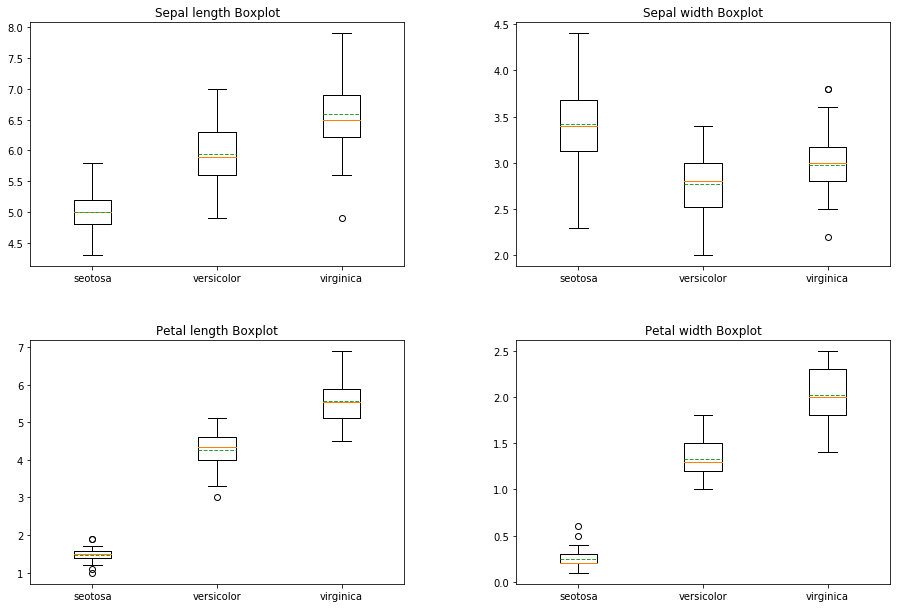

In [22]:
fig, axs = plt.subplots(2,2)

#꽃받침의 길이
axs[0, 0].boxplot([iris_setosa['SepalLengthCm'], iris_versicolor['SepalLengthCm'], iris_virginica['SepalLengthCm']],
           labels = ['seotosa', 'versicolor', 'virginica'],
           meanline = True,
           showmeans = True)
axs[0, 0].set_title('Sepal length Boxplot')

#꽃받침의 너비
axs[0, 1].boxplot([iris_setosa['SepalWidthCm'], iris_versicolor['SepalWidthCm'], iris_virginica['SepalWidthCm']],
           labels = ['seotosa', 'versicolor', 'virginica'],
           meanline = True,
           showmeans = True)
axs[0, 1].set_title('Sepal width Boxplot')

#꽃잎의 길이
axs[1, 0].boxplot([iris_setosa['PetalLengthCm'], iris_versicolor['PetalLengthCm'], iris_virginica['PetalLengthCm']],
           labels = ['seotosa', 'versicolor', 'virginica'],
           meanline = True,
           showmeans = True)
axs[1, 0].set_title('Petal length Boxplot')

#꽃잎의 너비
axs[1, 1].boxplot([iris_setosa['PetalWidthCm'], iris_versicolor['PetalWidthCm'], iris_virginica['PetalWidthCm']],
           labels = ['seotosa', 'versicolor', 'virginica'],
           meanline = True,
           showmeans = True)
axs[1, 1].set_title('Petal width Boxplot')

fig.subplots_adjust(left = 0.01, right = 2, bottom = 0.05, top = 2, hspace = 0.3, wspace = 0.3)

plt.show()

In [23]:
iris = datasets.load_iris()

pd.DataFrame(iris.data, columns=["sepal.length", "sepal.width", "petal.length", "petal.width"]).head()

,sepal.length,sepal.width,petal.length,petal.width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


# 2. 간단한 전처리
Decision Tree의 가장 큰 장점 중 하나는 데이터의 전처리가 거의 필요 없다는 점입니다.

학습용 데이터와 테스트용 데이터를 7:3으로 나누는 작업만 수행하고 모델을 생성하겠습니다.

In [24]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3, random_state = 1)

# 3. sklearn으로 실습해보기

## 3-1. Full-Tree만들어보기

In [25]:
estimator = DecisionTreeClassifier()
estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [26]:
print("학습 세트 정확도: {:.3f}%".format(estimator.score(X_train, y_train) * 100))
print("테스트 세트 정확도: {:.3f}%".format(estimator.score(X_test, y_test) * 100))

학습 세트 정확도: 100.000%
테스트 세트 정확도: 95.556%


sklearn의 Decision Tree는 각 입력 변수의 영향력을 설명해주는 함수가 있습니다.

이를 통해 각 변수가 Decision Tree를 구성하는데 얼마나 영향을 미쳤는지 확인할 수 있습니다.

In [27]:
pd.DataFrame(estimator.feature_importances_, index=["sepal.length", "sepal.width", "petal.length", "petal.width"],columns=['importance'])

,importance
sepal.length,0.021469
sepal.width,0.021469
petal.length,0.063170
petal.width,0.893892


이 모델의 구조를 Scratch로 탐색해보고, Graphviz를 사용하여 시각화까지 해보겠습니다

먼저 최대 깊이와, 몇 개의 Leaf가 존재하는지 찾아봅니다

In [29]:
#n_nodes = 트리를 이루는 전체 분기의 수
#children_left = 트리의 모든 왼쪽 자식 분기
#children_right = 트리의 모든 오른쪽 자식 분기
#feature = 분기의 분기 기준 변수
#threshold = 분기의 분기 기준 값

n_nodes = estimator.tree_.node_count
children_left = estimator.tree_.children_left
children_right = estimator.tree_.children_right
feature = estimator.tree_.feature
threshold = estimator.tree_.threshold

#node_depth = 모든 분기의 깊이
#is_leaves = 해당 분기의 잎파리 노드 여부
#leaves_count = 잎파리 노드의 수

node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
is_leaves = np.zeros(shape=n_nodes, dtype=bool)
leaves_count = 0
#첫번째 분기의 ID는 -1이기 때문에 -1을 가진 stack 생성
stack = [(0, -1)]

#모든 분기를 순회하며 해당 분기의 깊이, 잎파리 여부를 파악
#전체 잎파리 노드의 수 조사
while len(stack) > 0:
    node_id, parent_depth = stack.pop()
    node_depth[node_id] = parent_depth + 1

    if (children_left[node_id] != children_right[node_id]):
        stack.append((children_left[node_id], parent_depth + 1))
        stack.append((children_right[node_id], parent_depth + 1))
    else:
        is_leaves[node_id] = True
        leaves_count += 1
        
print('최대 깊이\t: %d'%np.max(node_depth))
print('Leaf의 갯수\t: %d'%leaves_count)

최대 깊이	: 4
Leaf의 갯수	: 7


이어서, 위에서 찾은 최대 깊이와, Leaf의 갯수를 사용하여 모델의 구조를 텍스트로 출력해보겠습니다

In [30]:
#모든 분기의 정보를 출력
#tab을 활용하여 깊이를 확인할 수 있으며 각 분기가 어떤 변수의 어떤 값을 기준으로 이루어졌는지 확인할 수 있다.
cols=["sepal.length", "sepal.width", "petal.length", "petal.width"]
for i in range(n_nodes):
    if is_leaves[i]:
        print("%snode=%s leaf node." % (node_depth[i] * "\t", i))
    else:
        print("%snode=%s test node: go to node %s if %s <= %.4f else to "
              "node %s."
              % (node_depth[i] * "\t",
                 i,
                 children_left[i],
                 cols[feature[i]],
                 threshold[i],
                 children_right[i],
                 ))
        

node=0 test node: go to node 1 if petal.width <= 0.8000 else to node 2.
	node=1 leaf node.
	node=2 test node: go to node 3 if petal.width <= 1.6500 else to node 8.
		node=3 test node: go to node 4 if petal.length <= 5.0000 else to node 5.
			node=4 leaf node.
			node=5 test node: go to node 6 if sepal.length <= 6.0500 else to node 7.
				node=6 leaf node.
				node=7 leaf node.
		node=8 test node: go to node 9 if petal.length <= 4.8500 else to node 12.
			node=9 test node: go to node 10 if sepal.width <= 3.1000 else to node 11.
				node=10 leaf node.
				node=11 leaf node.
			node=12 leaf node.


## 트리 시각화하기
**graphviz** 라는 라이브러리를 통해 시각화 할 수 있습니다.

우리는 graphviz의 기능을 웹에서도 수행해주는 **Webgraphviz**를 통해 시각화를 수행해보겠습니다.

![title](Images/DT_graphviz.png)

![title](Images/DT_fullTree.png)

In [12]:
export_graphviz(estimator, out_file='full_tree.dot')

## 3-2. Full Tree의 위험성

Full Tree는 대부분의 경우 Overfitting되거나, 비슷한 성능임에도 복잡한 구조를 가지게 됩니다.

이것을 다른 데이터셋을 사용하여 확인해보겠습니다

이번에 사용할 데이터는 전복 데이터 입니다. 이를 활용해 앞의 붓꽃 데이터와 같은 전처리를 진행 한 후 전복의 성별을 분류하는 모델을 Full Tree로 생성하고 확인해봅시다.

+ criterion = 분기 기준 설정방법으로 'gini', 'entropy'가 존재합니다.
+ max_depth = 트리가 가지는 최대 깊이를 지정하여 해당 수에 도달하면 트리의 성장을 멈춥니다.
+ max_leaf_nodes = 최대 leaf node의 수를 지정하여 해당 수에 도달하면 트리의 성장을 멈춥니다.

In [31]:
columns = list()
with open(join('data', 'abalone_attributes.txt'), 'r') as f:
    columns = f.read().split('\n')
abalone = pd.read_csv(join('data','abalone.txt'), names=columns)

y = abalone['Sex']

X = abalone
del X['Sex']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 1)

estimator = DecisionTreeClassifier()
estimator.fit(X_train, y_train)
print("학습 세트 정확도  : {:.3f}".format(estimator.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(estimator.score(X_test, y_test)))

학습 세트 정확도  : 1.000
테스트 세트 정확도: 0.477


In [33]:
#n_nodes = 트리를 이루는 전체 분기의 수
#children_left = 트리의 모든 왼쪽 자식 분기
#children_right = 트리의 모든 오른쪽 자식 분기
#feature = 분기의 분기 기준 변수
#threshold = 분기의 분기 기준 값

n_nodes = estimator.tree_.node_count
children_left = estimator.tree_.children_left
children_right = estimator.tree_.children_right
feature = estimator.tree_.feature
threshold = estimator.tree_.threshold

#node_depth = 모든 분기의 깊이
#is_leaves = 해당 분기의 잎파리 노드 여부
#leaves_count = 잎파리 노드의 수

node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
is_leaves = np.zeros(shape=n_nodes, dtype=bool)
leaves_count = 0
#첫번째 분기의 ID는 -1이기 때문에 -1을 가진 stack 생성
stack = [(0, -1)]

#모든 분기를 순회하며 해당 분기의 깊이, 잎파리 여부를 파악
#전체 잎파리 노드의 수 조사
while len(stack) > 0:
    node_id, parent_depth = stack.pop()
    node_depth[node_id] = parent_depth + 1

    if (children_left[node_id] != children_right[node_id]):
        stack.append((children_left[node_id], parent_depth + 1))
        stack.append((children_right[node_id], parent_depth + 1))
    else:
        is_leaves[node_id] = True
        leaves_count += 1
        
print('최대 깊이\t: %d'%np.max(node_depth))
print('Leaf의 갯수\t: %d'%leaves_count)

최대 깊이	: 28
Leaf의 갯수	: 862


In [34]:
pd.DataFrame(estimator.feature_importances_,index=X.keys(),columns=['Importance'])

,Importance
Length,0.092385
Diameter,0.081967
Height,0.076765
Whole weight,0.129865
Shucked weight,0.131365
Viscera weight,0.278556
Shell weight,0.116788
Rings,0.092310


In [35]:
export_graphviz(estimator, out_file='abalone_tree.dot')

# 4. 가지치기
위에서 확인한 것 처럼 Full Tree는 학습용 데이터에 대해서는 완벽하게 동작할 지라도 테스트용 데이터에는 매우 낮은 정확도를 보였습니다

이러한 점으로 봤을 때, Full Tree는 우리가 가진 데이터를 분류하는데 최적의 모델이 아님을 알 수 있습니다. 

따라서, 과적합 되는 문제를 해결하기 위해, **가지치기(Pruning)** 라는 개념이 등장했습니다. 

가지치기는 특정 가지의 유무에 따른 아래의 비용(Cost)함수의 값의 차이를 확인하여 더 적은 쪽의 트리를 채택하는 방법으로 진행됩니다.

![title](Images/DT_C.png)

위의 식에서 $Err(T)$는 의사 결정 트리가 맞추지 못한 답의 비율을 나타내고, 

$\alpha * L(T)$ 는 사용자가 설정한 계수 $\alpha$와 잎파리 노드(Leaf node)의 수를 곱한 값입니다.

이렇게 만들어진 cost를 사용하여, 정확도 뿐만 아니라 트리 구조의 복잡도 또한 반영하여 Decision Tree를 만들 수 있습니다

# 5. sklearn으로 가지치기
가지치기는 크게 두 가지로 나눌 수 있습니다.

+ 사후 가지치기(post-pruning): Full Tree를 생성한 후에 가지치기를 수행하는 것
+ 사전 가지치기(pre-pruning): 의사 결정 트리를 생성하기 전에 미리 트리의 복잡도를 제한해 두는 것입니다.

sklearn의 Decision Tree는 입력 인자를 통해 사전 가지치기를 지원하고 있습니다.

이를 통해 사전 가지치기를 수행하고 테스트용 데이터의 정확도를 0.5 이상 높여보세요

#### 입력 인자
+ criterion: 분기를 정함에 있어 기준이 되는 것('gini', 'entropy')
+ splliter: 분기의 기준 값을 결정하는 방법('best', 'random')
+ max_depth: 트리가 가질 수 있는 최대 깊이 해당 깊이 이상의 가지는 더 이상 자라지 않는다.(None, Integer = 수)
+ min_samples_split: 분기에서 데이터를 쪼갤 때 최소한의 수(Integer = 수, Float = 비율)
+ min_samples_leaf: 트리가 가질 최소한의 잎파리 노드의 수(Integer = 수, Float = 비율)
+ max_feature: 분기의 조건 변수를 선택할 때 확인할 변수의 수(None = 전체확인, 'auto', 'sqrt', 'log2', Integer = 수, Float = 비율)
+ max_leaf_nodes: 트리가 가질 최대한의 잎파리 노드의 수(None, Integer = 수)
+ min_impurity_decrease: 분기가 감소시켜야할 최소한의 불순도

In [138]:
oof=pd.DataFrame()
n=0
for md in range(2,20):
    for mln in range(5,500):
        for msl in range(1,10):
            
            estimator = DecisionTreeClassifier(criterion = 'entropy',
                                               max_depth = md,
                                               max_leaf_nodes = mln,
                                               min_samples_leaf=msl,
                                              )

            estimator.fit(X_train, y_train)

            oof.loc[n,'Max_Depth']=md
            oof.loc[n,'Max_Leaf_Node']=mln
            oof.loc[n,'Min_Samples_Leaf']=msl
            oof.loc[n,'Train_score']=estimator.score(X_train, y_train)
            oof.loc[n,'Test_score']=estimator.score(X_test, y_test)
            n+=1
        
# print("학습 세트 정확도: {:.3f}".format(estimator.score(X_train, y_train)))
# print("테스트 세트 정확도: {:.3f}".format(estimator.score(X_test, y_test)))

In [139]:
oof.iloc[oof.loc[:,'Test_score'].idxmax(),:]

Max_Depth            12.000000
Max_Leaf_Node       274.000000
Min_Samples_Leaf      6.000000
Train_score           0.745125
Test_score            0.554226
Name: 46976, dtype: float64

In [37]:
estimator = DecisionTreeClassifier(criterion = 'entropy',
                                   max_depth = 12,
                                   max_leaf_nodes = 274,
                                   min_samples_leaf = 6,
                                  )

estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=12,
                       max_features=None, max_leaf_nodes=274,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [38]:
#n_nodes = 트리를 이루는 전체 분기의 수
#children_left = 트리의 모든 왼쪽 자식 분기
#children_right = 트리의 모든 오른쪽 자식 분기
#feature = 분기의 분기 기준 변수
#threshold = 분기의 분기 기준 값

n_nodes = estimator.tree_.node_count
children_left = estimator.tree_.children_left
children_right = estimator.tree_.children_right
feature = estimator.tree_.feature
threshold = estimator.tree_.threshold

#node_depth = 모든 분기의 깊이
#is_leaves = 해당 분기의 잎파리 노드 여부
#leaves_count = 잎파리 노드의 수

node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
is_leaves = np.zeros(shape=n_nodes, dtype=bool)
leaves_count = 0
#첫번째 분기의 ID는 -1이기 때문에 -1을 가진 stack 생성
stack = [(0, -1)]

#모든 분기를 순회하며 해당 분기의 깊이, 잎파리 여부를 파악
#전체 잎파리 노드의 수 조사
while len(stack) > 0:
    node_id, parent_depth = stack.pop()
    node_depth[node_id] = parent_depth + 1

    if (children_left[node_id] != children_right[node_id]):
        stack.append((children_left[node_id], parent_depth + 1))
        stack.append((children_right[node_id], parent_depth + 1))
    else:
        is_leaves[node_id] = True
        leaves_count += 1
        
print('최대 깊이\t: %d'%np.max(node_depth))
print('Leaf의 갯수\t: %d'%leaves_count)

최대 깊이	: 12
Leaf의 갯수	: 274


In [151]:
export_graphviz(estimator, out_file='abalone_pruning_tree.dot')

# 6. Reference
+ Decision Tree: https://ko.wikipedia.org/wiki/%EA%B2%B0%EC%A0%95_%ED%8A%B8%EB%A6%AC_%ED%95%99%EC%8A%B5%EB%B2%95
+ Decision Tree(sklearn): https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier
+ Tree Estimate(sklearn): https://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html#sphx-glr-auto-examples-tree-plot-unveil-tree-structure-py
+ Webgraphviz: http://www.webgraphviz.com/